# Introduction to CNN and Computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-19 11:20:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.1MB/s    in 3.2s    

2023-01-19 11:20:34 (33.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beginning at any ML project is becoming one with the data

And for a CV project..this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

#Walk through pizza_steak directory and list the no of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in pizza steak/{dirpath}")

There are 2 directories and 0 images in pizza steak/pizza_steak
There are 2 directories and 0 images in pizza steak/pizza_steak/test
There are 0 directories and 250 images in pizza steak/pizza_steak/test/steak
There are 0 directories and 250 images in pizza steak/pizza_steak/test/pizza
There are 2 directories and 0 images in pizza steak/pizza_steak/train
There are 0 directories and 750 images in pizza steak/pizza_steak/train/steak
There are 0 directories and 750 images in pizza steak/pizza_steak/train/pizza


In [ ]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the class names programatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from sub directories

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's vizualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img


['765000.jpg']
Image shape: (512, 512, 3)


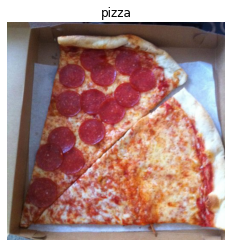

In [ ]:
#view a random image from the training dataset

img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 94,  88,  56],
        [ 93,  87,  55],
        [ 97,  88,  59],
        ...,
        [ 30,  35,  65],
        [ 21,  28,  57],
        [ 19,  25,  57]],

       [[ 93,  87,  55],
        [ 92,  86,  54],
        [ 96,  87,  58],
        ...,
        [ 27,  32,  62],
        [ 24,  31,  60],
        [ 24,  30,  62]],

       [[ 93,  86,  57],
        [ 92,  85,  56],
        [ 94,  85,  56],
        ...,
        [ 24,  31,  60],
        [ 26,  33,  62],
        [ 22,  31,  62]],

       ...,

       [[116, 142, 165],
        [ 99, 125, 148],
        [102, 128, 153],
        ...,
        [158, 138, 131],
        [163, 139, 135],
        [168, 144, 140]],

       [[112, 139, 166],
        [ 97, 124, 151],
        [ 99, 126, 153],
        ...,
        [165, 141, 137],
        [165, 141, 137],
        [169, 145, 141]],

       [[109, 136, 165],
        [ 97, 127, 155],
        [103, 133, 161],
        ...,
        [163, 139, 13

In [ ]:
#view the image shape
img.shape # returns width, height and colour channegls

(512, 512, 3)

In [ ]:
#Get all the pixel values between 0 and 1
img/255

array([[[0.36862745, 0.34509804, 0.21960784],
        [0.36470588, 0.34117647, 0.21568627],
        [0.38039216, 0.34509804, 0.23137255],
        ...,
        [0.11764706, 0.1372549 , 0.25490196],
        [0.08235294, 0.10980392, 0.22352941],
        [0.0745098 , 0.09803922, 0.22352941]],

       [[0.36470588, 0.34117647, 0.21568627],
        [0.36078431, 0.3372549 , 0.21176471],
        [0.37647059, 0.34117647, 0.22745098],
        ...,
        [0.10588235, 0.1254902 , 0.24313725],
        [0.09411765, 0.12156863, 0.23529412],
        [0.09411765, 0.11764706, 0.24313725]],

       [[0.36470588, 0.3372549 , 0.22352941],
        [0.36078431, 0.33333333, 0.21960784],
        [0.36862745, 0.33333333, 0.21960784],
        ...,
        [0.09411765, 0.12156863, 0.23529412],
        [0.10196078, 0.12941176, 0.24313725],
        [0.08627451, 0.12156863, 0.24313725]],

       ...,

       [[0.45490196, 0.55686275, 0.64705882],
        [0.38823529, 0.49019608, 0.58039216],
        [0.4       , 0

## An end-to-end example

Let's build a CNN to find patterns in our images, more specifically we need to load our images, preprocess our images, build CNN to find patterns in our images, compile our CNN and fit CNN to our data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values btwn 0 and 1, also called scaling or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
                                               )
valid_data = train_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
                                               )

# Buil a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 217ms/step - loss: 0.5743 - accuracy: 0.6973 - val_loss: 0.3721 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4245 - accuracy: 0.8087 - val_loss: 0.3344 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4087 - accuracy: 0.8180 - val_loss: 0.3641 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3800 - accuracy: 0.8333 - val_loss: 0.3330 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3546 - accuracy: 0.8473 - val_loss: 0.3469 - val_accuracy: 0.8620


In [ ]:
# Get a model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the non CNN model we built in our previous section to see if it works on our image data

The model we've built is from the Tensorflow playground

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 173ms/step - loss: 0.8860 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
 # Get a summary of model 2
 model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN model, model 2. performs terribly..let's try improving it

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 172ms/step - loss: 2.3773 - accuracy: 0.6480 - val_loss: 0.9316 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.9520 - accuracy: 0.7020 - val_loss: 0.7777 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.7622 - accuracy: 0.7293 - val_loss: 0.7138 - val_accuracy: 0.7220
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6682 - accuracy: 0.7393 - val_loss: 0.4481 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 8s 167ms/step - loss: 0.5006 - accuracy: 0.7880 - val_loss: 0.4595 - val_accuracy: 0.7940


In [ ]:
#Get the summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15000000/31000

483.8709677419355

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network sees to sort out and learn the most importsnt patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

##Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data (prepared it for our model, the main step here is was scaling/normalizing turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with the data

['2403776.jpg']
Image shape: (512, 512, 3)
['218711.jpg']
Image shape: (512, 382, 3)


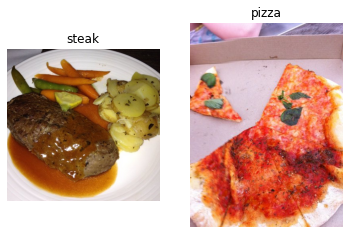

In [ ]:
#Visualize our data
plt.figure()
plt.subplot(1,2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images or more might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() #get the "next" batch of the images labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
#How many batches are there
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
#View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, #filters is the no of sliding windows going across an image. more the filters, more the complexity.
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input.
           padding="same", #if same, output shape is same as input shape. if valid, output shape is compressed
           activation="relu",
           input_shape=(224,224,3)), #input layer
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

In [ ]:
#Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Get the summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
#Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
#Fit the model
history_4 = model_4.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                    )

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.7583 - accuracy: 0.7207 - val_loss: 0.4806 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3959 - accuracy: 0.8233 - val_loss: 0.4013 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.2514 - accuracy: 0.9080 - val_loss: 0.4258 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0904 - accuracy: 0.9753 - val_loss: 0.4675 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.0310 - accuracy: 0.9947 - val_loss: 0.5350 - val_accuracy: 0.7880


### 5. Evaluating our Model

It looks like our model is learning something, let's evaluate it

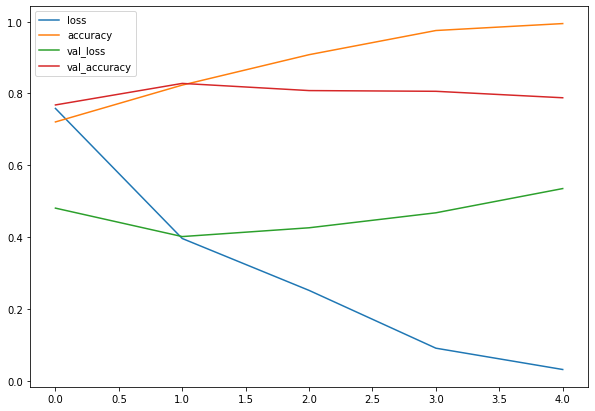

In [ ]:
#Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) 

  #Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


** Note: ** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. 

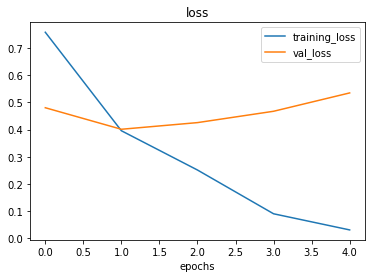

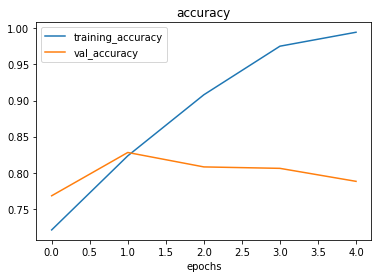

In [ ]:
# Checkout the loss and accuracy of model 4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a ML model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layer
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is our new baseline)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model

model_5.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the layer

history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 0.6188 - accuracy: 0.6487 - val_loss: 0.4772 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4858 - accuracy: 0.7840 - val_loss: 0.4002 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4391 - accuracy: 0.8067 - val_loss: 0.4073 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4187 - accuracy: 0.8147 - val_loss: 0.3576 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3840 - accuracy: 0.8373 - val_loss: 0.3726 - val_accuracy: 0.8320


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

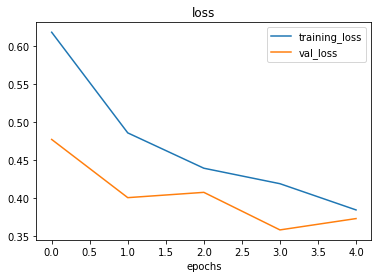

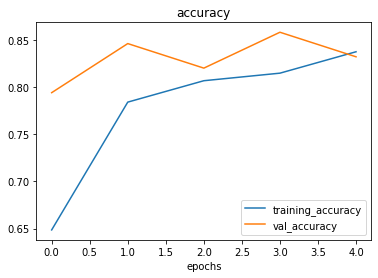

In [ ]:
# Plot loss curves

plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, #how much do you want to rotate an image?
                                             shear_range = 0.2, #how much do you want to shear(move it's axis) an image?
                                             zoom_range = 0.2, #zoom in
                                             width_shift_range = 0.2, #move your image around in x axis
                                             height_shift_range = 0.3, #move your image around in y axis
                                             horizontal_flip = True)

# Creata ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterbs. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something

Let's write some code to visualize data augmentation

In [ ]:
# Import data and augment it from the training directoryy
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                           target_size=(224,224),
                           batch_size=32,
                           class_mode = "binary",
                           shuffle=False
                           )

# Create non augmented trained data batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle=False)

# Create non augmented test data batches
print("Non augmented test data:")
IMG_SIZE = (223,224)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size = 32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually performed only on training data. Using `ImageDataGenerator` built in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally, let's visualize some augmented data!!

In [ ]:
# Get sample augmented data batches
image, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 26


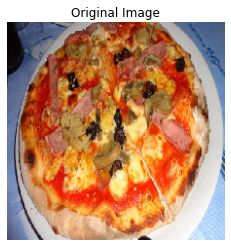

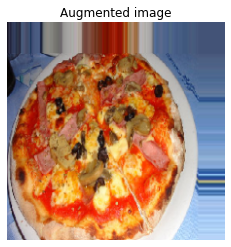

In [ ]:
# Show original image and augmented image

import random
random_number = random.randint(0, 32) # Our batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(image[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Now we've seen what augmented training data looks like, now let's create a model on augmented training data

In [ ]:
# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid") 
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented, #Fitting model 6 on augmented training data
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 29s 610ms/step - loss: 0.7000 - accuracy: 0.4527 - val_loss: 0.6807 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.7060 - accuracy: 0.5313 - val_loss: 0.6757 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6814 - accuracy: 0.6247 - val_loss: 0.6310 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6409 - accuracy: 0.6980 - val_loss: 0.5782 - val_accuracy: 0.6760
Epoch 5/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6460 - accuracy: 0.6640 - val_loss: 0.6352 - val_accuracy: 0.6740
